# TITANIC SURVIVAL PREDECTION

## Importing Library

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data

In [2]:
# Visual Python: Data Analysis > File
train_df = pd.read_csv('./titanic_Data/train.csv')


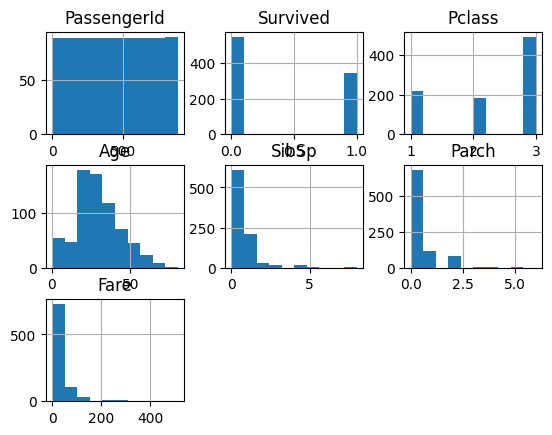

In [3]:
# Visual Python: Data Analysis > Data Info
train_df.hist()
plt.show()

## Slicing features from traget

In [4]:
# Visual Python: Data Analysis > Subset
features = train_df.iloc[:, [2,4,5,6,7,9,11]]

In [5]:
# Visual Python: Data Analysis > Subset
target = train_df.iloc[:, 1]

## preparing Data

### transforming data using one_hot_encoder & dealing with missing data


In [6]:
# Visual Python: Data Analysis > Frame
features = pd.get_dummies(data=features, columns=['Sex'])
features = pd.get_dummies(data=features, columns=['Embarked'])
features.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True
5,3,NaN,0,0,8.4583,False,True,False,True,False
6,1,54.0,0,0,51.8625,False,True,False,False,True
7,3,2.0,3,1,21.0750,False,True,False,False,True
8,3,27.0,0,2,11.1333,True,False,False,False,True
9,2,14.0,1,0,30.0708,True,False,True,False,False


In [7]:
# Visual Python: Data Analysis > Frame
features = features.fillna(features.median())


In [8]:
# Visual Python: Data Analysis > Data Info
pd.DataFrame({'Null Count': features.isnull().sum(), 'Non-Null Count': features.notnull().sum()})

,Null Count,Non-Null Count
Pclass,0,891
Age,0,891
SibSp,0,891
Parch,0,891
Fare,0,891
Sex_female,0,891
Sex_male,0,891
Embarked_C,0,891
Embarked_Q,0,891
Embarked_S,0,891


In [9]:
features=features.values
target=target.values

In [10]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=123)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
cf2 = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)

In [15]:
cf4 = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)

In [16]:
cf7 = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)

In [17]:
cf2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [18]:
y_pred_kNN2=cf2.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
m2 = confusion_matrix(y_test, y_pred_kNN2, labels=cf2.classes_)


In [21]:
m2

array([[130,   9],
       [ 43,  41]])

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print(f'Accuracy KNN=2 = {accuracy_score(y_test, y_pred_kNN2):.3f}')

Accuracy KNN=2 = 0.767


In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, y_pred_kNN2))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       139
           1       0.82      0.49      0.61        84

    accuracy                           0.77       223
   macro avg       0.79      0.71      0.72       223
weighted avg       0.78      0.77      0.75       223



In [27]:
 cf4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [28]:
y_pred_kNN4=cf4.predict(X_test)

In [29]:
m4 = confusion_matrix(y_test, y_pred_kNN4, labels=cf4.classes_)
m4

array([[130,   9],
       [ 29,  55]])

In [30]:
print(f'Accuracy KNN=4 = {accuracy_score(y_test, y_pred_kNN4):.3f}')

Accuracy KNN=4 = 0.830


In [31]:
print(classification_report(y_test, y_pred_kNN4))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       139
           1       0.86      0.65      0.74        84

    accuracy                           0.83       223
   macro avg       0.84      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223



In [32]:
 cf7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:
y_pred_kNN7=cf7.predict(X_test)

In [34]:
m7 = confusion_matrix(y_test, y_pred_kNN7, labels=cf7.classes_)
m7

array([[120,  19],
       [ 25,  59]])

In [35]:
print(f'Accuracy KNN=7= {accuracy_score(y_test, y_pred_kNN7):.3f}')

Accuracy KNN=7= 0.803


In [36]:
print(classification_report(y_test, y_pred_kNN7))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       139
           1       0.76      0.70      0.73        84

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



### difference between different n (neighbors) values

In [37]:
print(f'Accuracy n=7= {accuracy_score(y_test, y_pred_kNN7):.3f}')
print(f'Accuracy n=4= {accuracy_score(y_test, y_pred_kNN4):.3f}')
print(f'Accuracy n=2= {accuracy_score(y_test, y_pred_kNN2):.3f}')


Accuracy n=7= 0.803
Accuracy n=4= 0.830
Accuracy n=2= 0.767


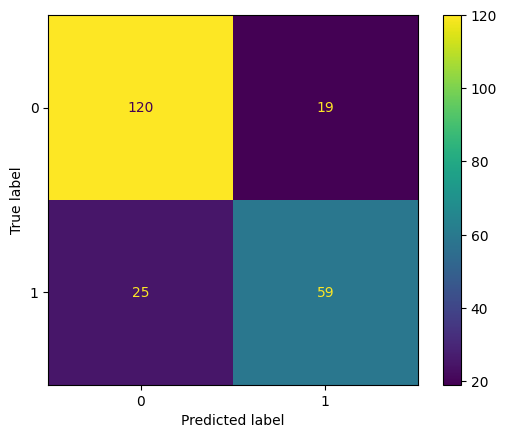

In [38]:
ConfusionMatrixDisplay(m7, display_labels=cf7.classes_).plot();

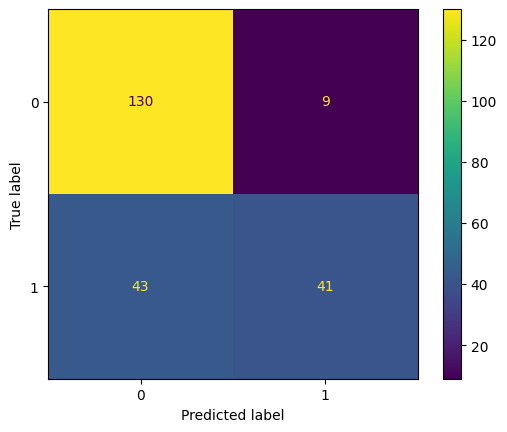

In [39]:
ConfusionMatrixDisplay(m2, display_labels=cf2.classes_).plot();

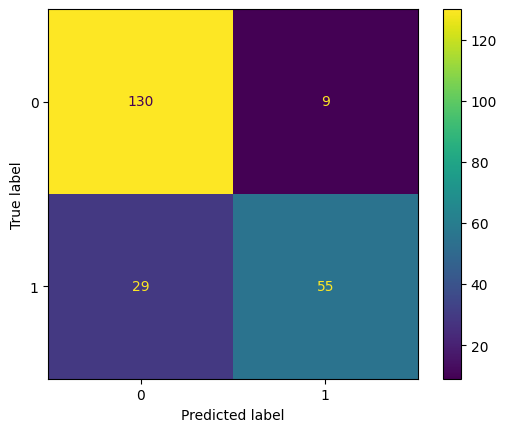

In [40]:
ConfusionMatrixDisplay(m4, display_labels=cf4.classes_).plot();